<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-2-Statistics/blob/master/122_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Recap: t-tests

In [0]:
# imports

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [0]:
# are there any null values? these will throw off the t-test


In [0]:
# salary values


In [0]:
## what is the average age?


In [0]:
# restrict to high earners


In [0]:
# is age continuous?


In [0]:
# is the average age of high earners above the population average? yes.


In [0]:
# is there a sig difference between the age of high and low earners? yes.


In [0]:
# subset male and female low earners


# note the trailing space.

In [0]:
# is there a sig difference between the male and female low earners? yes.


## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
# consider a crosstab. Are men and women equally distributed by salary?


In [0]:
# can we test that?


In [0]:
# Is a distribution normal? This is a poisson distribution


In [0]:
# Is it normal?


In [0]:
# mean, std dev, number of obs



# Pretty clearly  normal

In [0]:
# display that!


In [0]:
# Poisson models arrival times and is related to the binomial (coinflip)


# Pretty clearly not normal

In [0]:
# display that!


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Central Limit Theorem



In [0]:
import numpy as np

In [0]:
# Flip a coin.
np.random.binomial(n=1, p=.5)

0

In [0]:
# Let me flip a coin twelve times.
coinflips = np.random.binomial(n=1, p=.5, size=12)

In [0]:
# show that.
coinflips

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [0]:
# what is the mean of this sample of coinflips?
coinflips.mean()

0.5833333333333334

In [0]:
# what if I do it again?
coinflips = np.random.binomial(n=1, p=.5, size=12)

In [0]:
# and the mean?
coinflips.mean()

0.5

In [0]:
# why are these means different? shouldn't it be the same at .5 for a fair coin?


**each of these 'samples' is an estimate of the distribution.** . 
https://www.youtube.com/watch?v=Kq7e6cj2nDw

In [0]:
# take 3000 samples of size 12, and make a list of their means.
sample_means=[]
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample=coinflips
  sample_means.append(coinflips.mean())
print(len(sample_means))

3000


In [0]:
# look at the first 10 means.
sample_means[:10]

[0.75,
 0.5833333333333334,
 0.3333333333333333,
 0.5,
 0.4166666666666667,
 0.5,
 0.8333333333333334,
 0.5833333333333334,
 0.4166666666666667,
 0.4166666666666667]

In [0]:
# make a df of one sample
import pandas as pd
mysamples = pd.DataFrame({'single_sample': one_sample})
mysamples.tail()

,single_sample
7,1
8,1
9,1
10,0
11,1


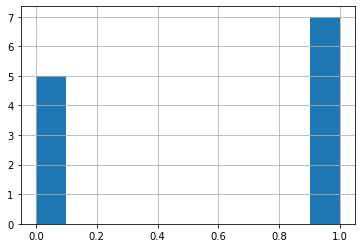

In [0]:
# this df is clearly a binomial distribution (one and zero are the only options)
mysamples['single_sample'].hist();

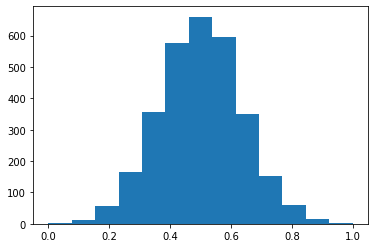

In [0]:
# now plot all 3000 sample means
import matplotlib.pyplot as plt
plt.hist(sample_means, bins=13);

In [0]:
# is this a normal distribution?
from scipy.stats import normaltest
normaltest(sample_means)

NormaltestResult(statistic=0.6634362562369397, pvalue=0.717689590861603)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [0]:
# let's pretend each sample included 100 coin flips, not just 12.
sample_means=[]
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=1000)
  one_sample=coinflips
  sample_means.append(coinflips.mean())
print(len(sample_means))
print(sample_means[:10])
# the higher my sample size, the closer I get to .5!


3000
[0.512, 0.49, 0.527, 0.51, 0.487, 0.469, 0.503, 0.515, 0.49, 0.529]


(array([  1.,   6.,  40., 125., 244., 601., 648., 694., 385., 167.,  69.,
         16.,   4.]),
 array([0.437     , 0.44638462, 0.45576923, 0.46515385, 0.47453846,
        0.48392308, 0.49330769, 0.50269231, 0.51207692, 0.52146154,
        0.53084615, 0.54023077, 0.54961538, 0.559     ]),
 <a list of 13 Patch objects>)

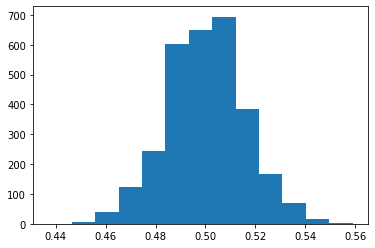

In [0]:
# when I plot, it gets a little taller and a little narrower!
plt.hist(sample_means, bins=13)

This outcome is what we call the Central Limit Theorem. No matter the distribution of my underlying data, the distribution of the estimates will be distributed normally.

In [0]:
# Compare sets of small and large samples


In [0]:
# Plot that for comparison: it gets taller, narrower, and more normal.


## Confidence Interval

![source](https://www.mathsisfun.com/data/images/ci95.gif)

With 95% confidence, the population mean is within these bounds. This is the [margin of error](https://www.monmouth.edu/polling-institute/reports/monmouthpoll_ia_111219/) we often seen in political polls.

Between the upper and lower bounds we can find 95% of the sample means.

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

s = standard deviation of the sample  
n = sample size  
t = test statistic  
X = sample mean
  
As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.

In [0]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats

In [0]:
def conf_int(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    mydata = np.array(data) 
    mymean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    margin = stderr*stats.t.ppf((1 + confidence)/ 2, n-1)
    return (mymean, mymean - margin, mymean + margin)

In [0]:
# what's the conf interval for a sample of 500 coin flips?
coinflips = np.random.binomial(n=1, p=.5, size=500)
conf_int(coinflips) # mean, upper bound, lower bound.

(0.482, 0.4380518226796466, 0.5259481773203534)

In [0]:
# for coinflips, do we actually know the population mean?


In [0]:
# try this again. It should capture the mean 95% of the time.
coinflips = np.random.binomial(n=1, p=.5, size=4000)
conf_int(coinflips) # mean, upper bound, lower bound.

(0.498, 0.48249861921492987, 0.5135013807850701)

We want the t-statistic that corresponds to the probability cut off for a given t distribution  (a distribution with a certain 'degrees of freedom').  
`stats.t.ppf` is just looking up the corresponding t-statistic.

**Degrees of freedom**  
degrees of freedom equals the number of "observations" minus the number of required relations among the observations (e.g., the number of parameter estimates). For a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability.
https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

**Looking at stats.t.ppf**

In [0]:
# stats.t.ppf(# probability cutoff, # degrees of freedom)

# 95% confidence level -> .025

# 1 - confidence_level == .05 / 2 -> .025



## Graphically Represent a Confidence Interval

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
coinflips42.mean()

0.5476190476190477

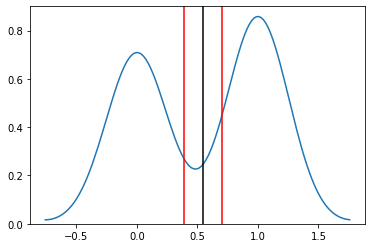

In [0]:
# fake data - one samle of 42 coin flips
coinflips42 = np.random.binomial(n=1, p=.5, size=42)
# kernel density estimate
sns.kdeplot(coinflips42)
CI = conf_int(coinflips42)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='black');

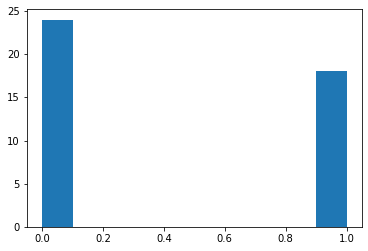

In [0]:
plt.hist(coinflips42);

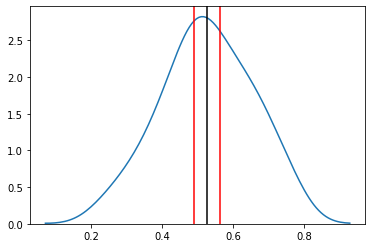

In [0]:
# fake data - 50 samples of 12 coin flips
samplemeans=[]
for x in range(0,50):
  coinflips=np.random.binomial(1, .5, 12)
  samplemeans.append(coinflips.mean())
sns.kdeplot(samplemeans)
CI = conf_int(samplemeans)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='black');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

**Note that scipy has a built-in function to calculate the confidence interval**   
t.interval

In [0]:
coinflip_means = []
for x  in range (0,100):
  coinflips = np.random.binomial(1, .5, 30)
  coinflip_means.append(coinflips.mean())

**Rebuild the earlier function**
but using `t.interval` instead.

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
grandmean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=grandmean, scale=std_err)
print(grandmean, CI)

0.4953333333333333 (0.4767677439728039, 0.5138989226938626)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval

A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
# pick a value for my null hypothesis and check the p-value
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=0.5700056272140076, pvalue=0.5699651754207207)

In [0]:
# what if I pick a null hypothesis that's just outside of our confidence interval? 
ttest_1samp(coinflip_means, .46)

Ttest_1sampResult(statistic=3.776287280292817, pvalue=0.00027170917676469687)

In [0]:
# I would only see this 5% of the time, so it's unlikely and I reject the null hypothesis.
# A comparison of what we EXPECT and what we OBSERVE.

## Chi Squared Test $\chi^{2}$

A test for dependence of categorical variables. (ie, are they correlated?)

In [0]:
# read back in the earlier data.
adults = pd.read_csv(url, na_values=' ?')
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# just the numeric columns
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
# just the non-numeric columns (ie, categorical)
adults.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
# create some binned categories 
# in order to create a new var
adults['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [0]:
# convert that to a cat var
cut_points = [0, 9, 19, 29, 39, 49, 100]
mylabels = ['vlow', 'low', 'ave', 'hi', 'vhi', 'extreme']
adults['hpw_cats']=pd.cut(adults['hours-per-week'], cut_points, labels=mylabels)
adults[['hours-per-week', 'hpw_cats']]

,hours-per-week,hpw_cats
0,40,vhi
1,13,low
2,40,vhi
3,40,vhi
4,40,vhi
...,...,...
32556,38,hi
32557,40,vhi
32558,40,vhi
32559,20,ave


In [0]:
# check your work
adults['hpw_cats'].value_counts().sort_index()

vlow         458
low         1246
ave         2392
hi          3667
vhi        18336
extreme     6462
Name: hpw_cats, dtype: int64

In [0]:
# sex
adults['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
# create a crosstab
xtab = pd.crosstab(adults['sex'], adults['hpw_cats'], margins=True)
xtab

hpw_cats,vlow,low,ave,hi,vhi,extreme,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


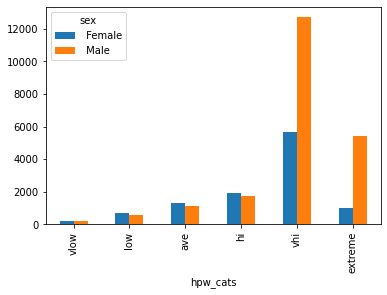

In [0]:
#Plots the bar chart
xtab.plot(kind='bar')

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
xtab

hpw_cats,vlow,low,ave,hi,vhi,extreme,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [0]:
# row sums
row_sums = xtab.iloc[0:2, 6].values
row_sums

array([10771, 21790])

In [0]:
# col sums
col_sums = xtab.iloc[2, 0:6].values
col_sums 

array([  458,  1246,  2392,  3667, 18336,  6462])

In [0]:
total = xtab.loc['All', 'All']
total

32561

In [0]:
# what are the EXPECTED values?
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pd.DataFrame(expected)

,0,1,2,3,4,5
0,151.503885,412.169958,791.260465,1213.023464,6065.448113,2137.594116
1,306.496115,833.830042,1600.739535,2453.976536,12270.551887,4324.405884


In [0]:
observed = pd.crosstab(adults['sex'], adults['hpw_cats']).values
pd.DataFrame(observed)

,0,1,2,3,4,5
0,235,671,1287,1914,5636,1028
1,223,575,1105,1753,12700,5434


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

2287.190943926107

In [0]:
# Degrees of Freedom of a Chi-squared test

# degrees_of_freedom = (num_rows - 1)(num_columns - 1)
dof = (len(row_sums)-1)* (len(col_sums)-1)

# Calculate Degrees of Freedom
dof

5

## Run a $\chi^{2}$ Test using Scipy

In [0]:
chi_squared

2287.190943926107

In [0]:
stats.chi2_contingency(observed)

(2287.190943926107,
 0.0,
 5,
 array([[  151.50388502,   412.16995793,   791.26046497,  1213.02346365,
          6065.44811277,  2137.59411566],
        [  306.49611498,   833.83004207,  1600.73953503,  2453.97653635,
         12270.55188723,  4324.40588434]]))

In [0]:
print('stat', stats.chi2_contingency(observed)[0])
print('pvalue', stats.chi2_contingency(observed)[1])
print('dof', stats.chi2_contingency(observed)[2])
pd.DataFrame(stats.chi2_contingency(observed)[3])

stat 2287.190943926107
pvalue 0.0
dof 5


,0,1,2,3,4,5
0,151.503885,412.169958,791.260465,1213.023464,6065.448113,2137.594116
1,306.496115,833.830042,1600.739535,2453.976536,12270.551887,4324.405884


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex.

### Another example

In [0]:
# sex and salary
pd.crosstab(adults['sex'], adults['salary'], normalize='index')

salary,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


In [0]:
# break out the components
observed = pd.crosstab(adults['sex'], adults['salary'], normalize='index').values

In [0]:
# chi square test
print('pvalue', stats.chi2_contingency(observed)[1])
print('expected')
pd.DataFrame(stats.chi2_contingency(observed)[3])

pvalue 0.16114751943322453
expected


,0,1
0,0.792401,0.207599
1,0.792401,0.207599


In [0]:
# age and salary
# good example and recap of how to recode a variable
# np.where, .map, .replace, ... , .loc
adults['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [0]:
# age cats
adults['age_groups']=0
adults.loc[adults['age']>20, 'age_groups']=1
adults.loc[adults['age']>30, 'age_groups']=2
adults.loc[adults['age']>40, 'age_groups']=3
adults.loc[adults['age']>50, 'age_groups']=4
adults['age_groups'].value_counts().sort_index()

0    2410
1    8162
2    8546
3    6983
4    6460
Name: age_groups, dtype: int64

In [0]:
# crosstab
observed = pd.crosstab(adults['age_groups'], adults['salary']).values
observed

array([[2408,    2],
       [7482,  680],
       [6140, 2406],
       [4328, 2655],
       [4362, 2098]])

In [0]:
# chi square test
stats.chi2_contingency(observed)

(2935.441819762824, 0.0, 4, array([[1829.64896656,  580.35103344],
        [6196.51239213, 1965.48760787],
        [6488.04152207, 2057.95847793],
        [5301.42686035, 1681.57313965],
        [4904.3702589 , 1555.6297411 ]]))